<a href="https://colab.research.google.com/github/r0cd7b/DSAC/blob/master/Lab3_Multinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial Classification


*   Iris Dataset
*   One-hot Encoding
*   Softmax
*   Cross Entropy(Multi-Class)





In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

iris_data = sns.load_dataset("iris")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X, y = iris_data.values[:, :4].astype("float32"), iris_data.values[:, 4]

y_pre = LabelEncoder().fit_transform(y)
y = np_utils.to_categorical(y_pre)
X[:3], y[:3], y[-3:]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]], dtype=float32), array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]], dtype=float32), array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]], dtype=float32))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape

((120, 4), (120, 3))

In [4]:
model = Sequential()

model.add(Dense(16, input_shape=(4,), activation="relu"))
model.add(Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")
history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)
model.save("iris_model.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [5]:
del model
model = load_model("iris_model.h5")
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.0597 - accuracy: 1.0000


[0.059692081063985825, 1.0]

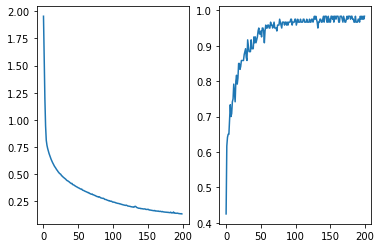

In [6]:
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])

# K-Fold Validation

In [16]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

cv_scores = []
for train_index, test_index in skf.split(X, y_pre):
  model = Sequential()
  model.add(Dense(16, input_shape=(4,), activation="relu"))
  model.add(Dense(3, activation='softmax'))

  model.summary()
  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y_pre[train_index], y_pre[test_index]
  y_train_ohe = np_utils.to_categorical(y_train)
  y_test_ohe = np_utils.to_categorical(y_test)
  
  model.fit(X_train, y_train_ohe, epochs=50, batch_size=10, verbose=0)
  score = model.evaluate(X_test, y_test_ohe)
  cv_scores.append(score)

print(cv_scores)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.9333
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_______________

# Callback - checkpoint and early stoping

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

df_all = pd.read_csv("wine.csv", header=None)
df_all

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
